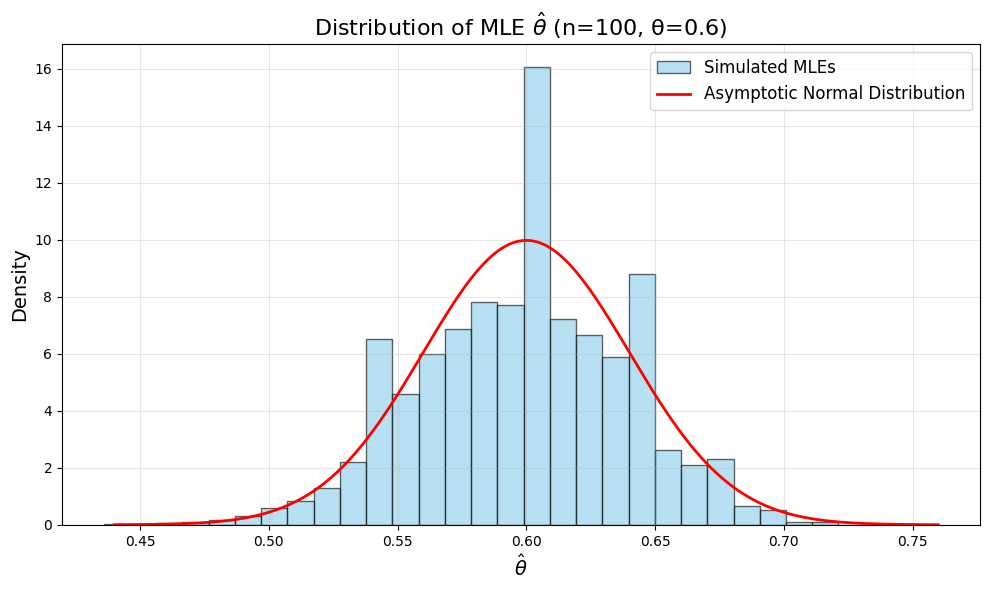

Kolmogorov-Smirnov Test:
Statistic: 0.0447, p-value: 0.0000
Reject the null hypothesis: The MLEs do not follow the normal distribution.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# 1. Define True Parameter
true_theta = 0.6  # True value of theta in (0,1)

# 2. Set Simulation Parameters
n = 100          # Sample size for each simulation
num_simulations = 10000  # Total number of simulations

# 3. Simulate Data and Compute MLEs
# The number of negative samples 'a' follows a Binomial(n, p) where p = theta^2
p = true_theta ** 2  # Probability of a negative sample

# Simulate 'a' for all simulations at once
a_values = np.random.binomial(n, p, size=num_simulations)
b_values = n - a_values  # Number of positive samples

# Compute MLE for theta: theta_hat = sqrt(a / n)
theta_hats = np.sqrt(a_values/(a_values + b_values))

# 4. Plot Histogram of MLEs
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(theta_hats, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated MLEs')

# 5. Overlay Theoretical Normal Distribution
# Calculate theoretical mean and standard deviation
# From asymptotic theory: E[theta_hat] = theta, Var(theta_hat) = (1 - theta^2)/(4 * n * theta^2)
mu = true_theta
sigma = np.sqrt((1 - true_theta**2) / (4 * n))

# Generate points for the normal distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
normal_dist = stats.norm.pdf(x, mu, sigma)

plt.plot(x, normal_dist, 'r-', lw=2, label='Asymptotic Normal Distribution')

# 6. Customize the Plot
plt.title(f'Distribution of MLE $\hat{{\\theta}}$ (n={n}, θ={true_theta})', fontsize=16)
plt.xlabel('$\hat{\\theta}$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# 7. Display the Plot
plt.show()

# 8. Additional: Statistical Test (Optional)
# Perform a Kolmogorov-Smirnov test to compare the MLE distribution to the normal distribution
ks_stat, p_value = stats.kstest(theta_hats, 'norm', args=(mu, sigma))
print(f"Kolmogorov-Smirnov Test:\nStatistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation of KS Test
if p_value > 0.05:
    print("Fail to reject the null hypothesis: The MLEs follow the normal distribution.")
else:
    print("Reject the null hypothesis: The MLEs do not follow the normal distribution.")


In [5]:
import sympy as sp

# Step 1: Define the symbolic variable
theta = sp.symbols('theta')

# Step 2: Define the expression f(theta) = -2*theta / (1 - theta**2)
f_theta = -2 * theta / (1 - theta**2)

# Display the original function
print("Original function f(theta):")
sp.pprint(f_theta)
print("\n")

# Step 3: Differentiate f(theta) with respect to theta
f_prime = sp.diff(f_theta, theta)

# Display the derivative
print("Derivative of f(theta) with respect to theta:")
sp.pprint(f_prime)
print(f_prime)
print("\n")

# Step 4: Simplify the derivative (optional)
f_prime_simplified = sp.simplify(f_prime)

# Display the simplified derivative
print("Simplified derivative of f(theta):")
sp.pprint(f_prime_simplified)


Original function f(theta):
-2⋅θ  
──────
     2
1 - θ 


Derivative of f(theta) with respect to theta:
       2            
    4⋅θ         2   
- ───────── - ──────
          2        2
  ⎛     2⎞    1 - θ 
  ⎝1 - θ ⎠          
-4*theta**2/(1 - theta**2)**2 - 2/(1 - theta**2)


Simplified derivative of f(theta):
  ⎛   2    ⎞ 
2⋅⎝- θ  - 1⎠ 
─────────────
 4      2    
θ  - 2⋅θ  + 1


In [11]:
import scipy.stats as stats

# Define the degree of freedom
df = 1

# Compute the 0.95 quantile of the Chi-squared distribution
quantile_095 = stats.chi2.ppf(0.95, df)

# Print the result
print(f"The 0.95 quantile of the Chi-squared distribution with {df} degree of freedom is: {quantile_095}")


The 0.95 quantile of the Chi-squared distribution with 1 degree of freedom is: 3.841458820694124


In [14]:
import numpy as np
import scipy.stats as stats

def wald_test_statistic(n, a, b):
    """
    Performs the Wald test for the null hypothesis H0: theta = sqrt(0.5).

    Parameters:
    n (int): Total number of observations.
    a (int): Number of observations where x ∈ (-1, 0).
    b (int): Number of observations where x ∈ [0, 1].

    Returns:
    dict: A dictionary containing the test statistic, critical value, p-value, and conclusion.
    """
    # Step 1: Compute the MLE estimate of theta
    hat_theta = np.sqrt(a / n)

    # Null hypothesis value of theta
    theta_0 = np.sqrt(0.5)

    # Step 2: Compute the variance V under H0: theta = theta_0
    V = (1 - theta_0**2) / 4

    # Step 3: Compute the test statistic T^2
    T_squared = (np.sqrt(n) * (hat_theta - theta_0) / np.sqrt(V))**2

    # Step 4: Critical value from chi-squared distribution with 1 degree of freedom at 5% significance level
    alpha = 0.05
    df = 1
    critical_value = stats.chi2.ppf(1 - alpha, df)

    # Step 5: Compute the p-value
    p_value = 1 - stats.chi2.cdf(T_squared, df)

    # Step 6: Conclusion
    if T_squared > critical_value:
        conclusion = "Reject the null hypothesis H0: theta = sqrt(0.5)."
    else:
        conclusion = "Fail to reject the null hypothesis H0: theta = sqrt(0.5)."

    # Return the results
    return {
        'hat_theta': hat_theta,
        'T_squared': T_squared,
        'critical_value': critical_value,
        'p_value': p_value,
        'conclusion': conclusion
    }

wald_test_statistic(n, a=40, b=60)

{'hat_theta': 0.6324555320336759,
 'T_squared': 4.458247200067301,
 'critical_value': 3.841458820694124,
 'p_value': 0.03473312058802469,
 'conclusion': 'Reject the null hypothesis H0: theta = sqrt(0.5).'}

In [17]:
p=0.4*0.2+4*(0.7*0.2)
p

0.6399999999999999

In [24]:
from scipy.stats import binom
posterior1= binom.pmf(3, 6, 0.4)*0.2
posterior2=binom.pmf(3, 6, 0.7)*0.8
total_probability = posterior1 + posterior2
posterior1, posterior2, total_probability
posterior1=posterior1/total_probability
posterior2=posterior2/total_probability
mean=posterior1*0.2+posterior2*0.8
mean
#posterior2

0.6369426751592355

In [26]:
from scipy.stats import binom
import numpy as np

# Prior probabilities
prior1 = 0.2   # P(p=0.4)
prior2 = 0.8   # P(p=0.7)

# Likelihoods
likelihood1 = binom.pmf(3, 6, 0.4)  # P(X=3 | p=0.4)
likelihood2 = binom.pmf(3, 6, 0.7)  # P(X=3 | p=0.7)

# Unnormalized posterior probabilities
posterior1 = likelihood1 * prior1
posterior2 = likelihood2 * prior2

# Total probability (evidence)
total_probability = posterior1 + posterior2

# Normalize the posterior probabilities
posterior1 /= total_probability
posterior2 /= total_probability

# Compute the Bayes estimate (posterior mean)
bayes_estimate = (0.4 * posterior1) + (0.7 * posterior2)

# Determine the MAP estimate
if posterior1 > posterior2:
    map_estimate = 0.4
else:
    map_estimate = 0.7

# Output the results
print("Posterior probabilities:")
print(f"P(p=0.4 | X=3): {posterior1}")
print(f"P(p=0.7 | X=3): {posterior2}")

print("\nEstimates:")
print(f"Bayes Estimate: {bayes_estimate}")
print(f"MAP Estimate: {map_estimate}")


Posterior probabilities:
P(p=0.4 | X=3): 0.27176220806794077
P(p=0.7 | X=3): 0.7282377919320593

Estimates:
Bayes Estimate: 0.6184713375796178
MAP Estimate: 0.7


In [ ]:
3. Consequences of Misapplying Models
a. Inaccurate Probability Estimates

    Overestimation of Tail Probabilities: Assuming a Poisson model when data are overdispersed (variance > mean) can overestimate the probability of extreme counts.

    Underestimation of Tail Probabilities: Conversely, if data exhibit underdispersion (variance < mean) relative to the Poisson model, tail probabilities may be underestimated.

3. Consequences of Misapplying Models
a. Inaccurate Probability Estimates

    Overestimation of Tail Probabilities: Assuming a Poisson model when data are overdispersed (variance > mean) can overestimate the probability of extreme counts.

    Underestimation of Tail Probabilities: Conversely, if data exhibit underdispersion (variance < mean) relative to the Poisson model, tail probabilities may be underestimated.

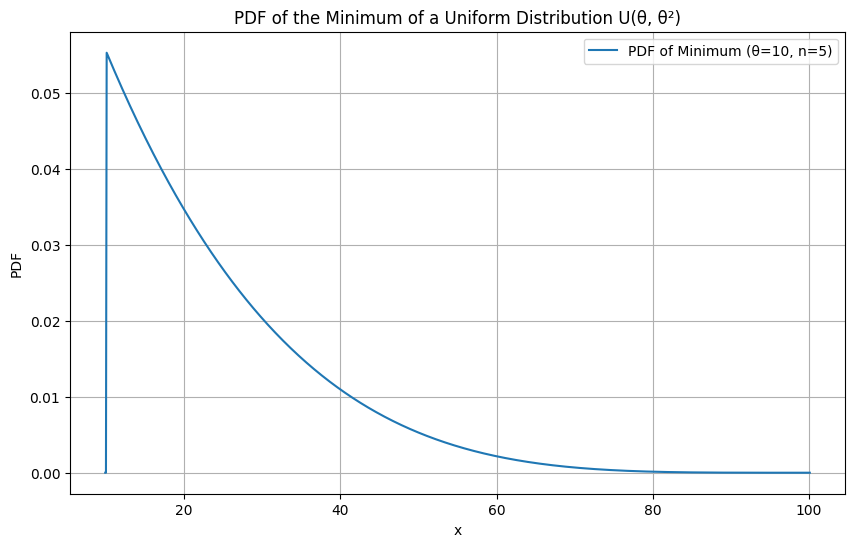

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def pdf_min_uniform(theta, n, x_values):
    """
    Computes the PDF of the minimum of a sample of size n
    from the Uniform distribution U(a, b) where a and b depend on theta.
    
    Parameters:
    - theta: parameter of the Uniform distribution
    - n: sample size
    - x_values: array of x values at which to compute the PDF
    
    Returns:
    - pdf_values: array of PDF values corresponding to x_values
    """
    # Determine the lower and upper bounds a and b
    if theta > 0:
        if theta > 1:
            a = theta
            b = theta**2
            delta = b - a  # delta = theta*(theta - 1)
        elif theta < 1:
            a = theta**2
            b = theta
            delta = b - a  # delta = theta*(1 - theta)
        else:
            # theta == 1
            # In this case, the distribution is degenerate at theta = 1
            # Handle this case separately
            a = b = 1
            delta = 0
    else:
        raise ValueError("Theta must be positive.")

    # Compute PDF values
    pdf_values = np.zeros_like(x_values)

    # Define the valid range of x
    valid_indices = (x_values >= a) & (x_values <= b)

    # Compute the PDF only for valid x values
    x_valid = x_values[valid_indices]

    if delta == 0:
        # Degenerate case when theta == 1
        pdf_values[valid_indices] = np.inf  # or handle accordingly
    else:
        # Compute the PDF using the formula
        f_x = n / delta * ((b - x_valid) / delta) ** (n - 1)
        pdf_values[valid_indices] = f_x

    return pdf_values

# Example usage:
theta = 10  # Change theta as needed
n = 5        # Sample size
x_min = min(theta, theta**2) - 0.1  # Slightly extend the range for visualization
x_max = max(theta, theta**2) + 0.1

# Create an array of x values
x_values = np.linspace(x_min, x_max, 1000)

# Compute the PDF values
pdf_values = pdf_min_uniform(theta, n, x_values)


# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label=f'PDF of Minimum (θ={theta}, n={n})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of the Minimum of a Uniform Distribution U(θ, θ²)')
plt.legend()
plt.grid(True)
plt.show()


[9.00000000e+00 8.84806718e+00 8.69855074e+00 8.55141460e+00
 8.40662321e+00 8.26414149e+00 8.12393489e+00 7.98596930e+00
 7.85021111e+00 7.71662717e+00 7.58518481e+00 7.45585181e+00
 7.32859640e+00 7.20338726e+00 7.08019352e+00 6.95898472e+00
 6.83973086e+00 6.72240234e+00 6.60697000e+00 6.49340508e+00
 6.38167922e+00 6.27176448e+00 6.16363330e+00 6.05725853e+00
 5.95261338e+00 5.84967148e+00 5.74840680e+00 5.64879369e+00
 5.55080688e+00 5.45442145e+00 5.35961285e+00 5.26635685e+00
 5.17462961e+00 5.08440759e+00 4.99566763e+00 4.90838687e+00
 4.82254280e+00 4.73811322e+00 4.65507626e+00 4.57341036e+00
 4.49309428e+00 4.41410708e+00 4.33642812e+00 4.26003707e+00
 4.18491389e+00 4.11103884e+00 4.03839244e+00 3.96695553e+00
 3.89670921e+00 3.82763484e+00 3.75971410e+00 3.69292888e+00
 3.62726139e+00 3.56269405e+00 3.49920958e+00 3.43679092e+00
 3.37542130e+00 3.31508415e+00 3.25576318e+00 3.19744233e+00
 3.14010578e+00 3.08373793e+00 3.02832342e+00 2.97384712e+00
 2.92029412e+00 2.867649

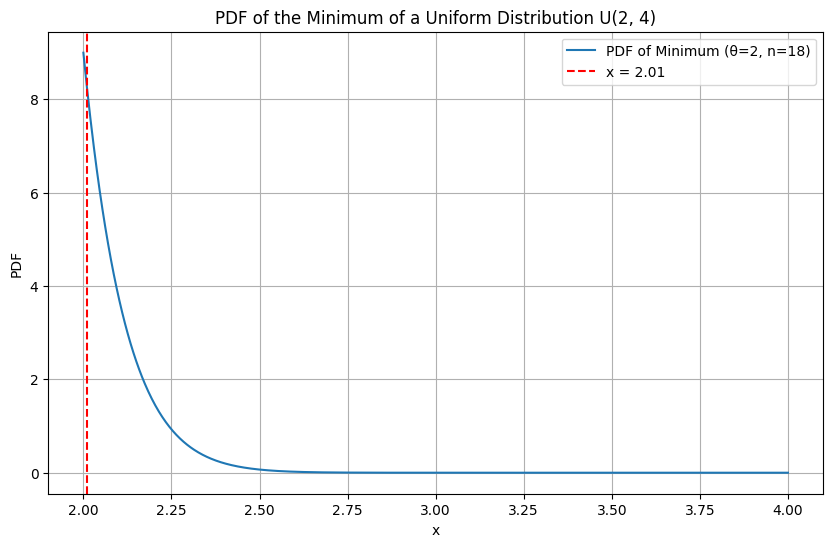

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta = 2
a = theta
b = theta**2
n = 18

# Define x values
x_values = np.linspace(a, b, 1000)

# Compute f(x) and F(x)
f_x = 1 / (b - a)  # Constant for Uniform distribution
F_x = (x_values - a) / (b - a)

# Compute the PDF of the minimum
pdf_min = n * (1 - F_x)**(n - 1) * f_x

print(pdf_min)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_min, label=f'PDF of Minimum (θ={theta}, n={n})')
plt.axvline(x=2.01, color='red', linestyle='--', label='x = 2.01')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF of the Minimum of a Uniform Distribution U(2, 4)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np

def compute_probability_min_uniform(theta, n, x):
    """
    Computes the probability P(X_{(1)} ≤ x) for the minimum of a sample of size n
    from the Uniform distribution U(θ, θ²).

    Parameters:
    - theta: Positive float, parameter θ of the Uniform distribution.
    - n: Positive integer, sample size.
    - x: Float, observed value of the sample minimum X_{(1)}.

    Returns:
    - probability: The probability P(X_{(1)} ≤ x) under the null hypothesis θ.
    """
    if theta <= 0:
        raise ValueError("Theta must be positive.")
    if n <= 0:
        raise ValueError("Sample size n must be positive.")
    
    # Determine the lower and upper bounds a and b
    if theta > 1:
        a = theta
        b = theta ** 2
    elif theta < 1:
        a = theta ** 2
        b = theta
    else:
        # theta == 1
        a = b = 1
        if x < 1:
            return 0.0
        else:
            return 1.0

    # Check if x is within the valid range
    if x < a:
        return 0.0
    elif x > b:
        return 1.0

    # Compute the cumulative distribution function F(x)
    delta = b - a  # Length of the interval
    F_x = (x - a) / delta  # CDF of Uniform distribution at x

    # Compute the probability P(X_{(1)} ≤ x)
    probability = 1 - (1 - F_x) ** n

    probability_max=F_x**n

    return probability, probability_max

theta = 2
n = 18
x = 2.01

probability, probability_max = compute_probability_min_uniform(theta, n, x)
print(f"P(X(1) ≤ {x}) = {probability:.4f}")
print(f"P(X(1) ≤ {x}) = {probability_max:.4f}")


P(X(1) ≤ 2.01) = 0.0863
P(X(1) ≤ 2.01) = 0.0000


In [13]:
import numpy as np

def compute_critical_value_max_uniform(theta, n, alpha):
    """
    Computes the critical value c for the maximum of a sample of size n
    from the Uniform distribution U(θ, θ²) for a given significance level α.
    
    Parameters:
    - theta: Positive float, parameter θ of the Uniform distribution (θ > 1).
    - n: Positive integer, sample size.
    - alpha: Significance level (0 < α < 1).
    
    Returns:
    - c: Critical value such that P(X_{(n)} ≥ c | θ) = α.
    """
    if theta <= 1:
        raise ValueError("Theta must be greater than 1 for this test.")
    if n <= 0:
        raise ValueError("Sample size n must be positive.")
    if not (0 < alpha < 1):
        raise ValueError("Alpha must be between 0 and 1.")
    
    # Compute F(c)
    F_c = (1 - alpha) ** (1 / n)
    
    # Compute c
    delta = theta * (theta - 1)  # Length of the interval
    c = theta + delta * F_c
    
    return c

# Example usage:
theta = 2
n = 18
alpha = 0.05

critical_value = compute_critical_value_max_uniform(theta, n, alpha)
print(f"The critical value c is {critical_value:.4f}")


The critical value c is 3.9943


In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]

In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]

In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]

In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]

In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]

Wald Test:
Test Statistic: 3.373594335693463
p_value:0.06624907091119425
---------------------
Likelihood Ratio Test:
Test Statistic: 3.8534749217870967
p_value: 0.04964303921818336


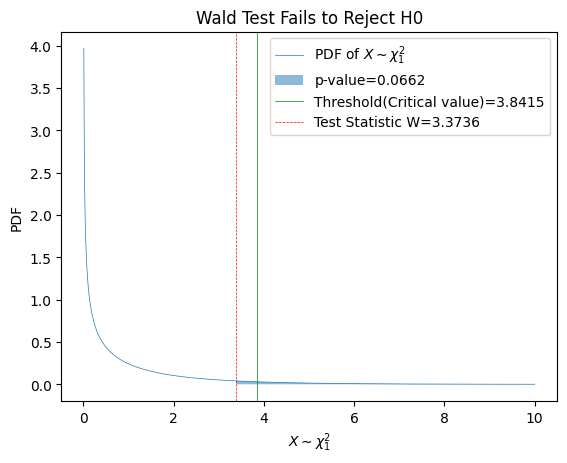

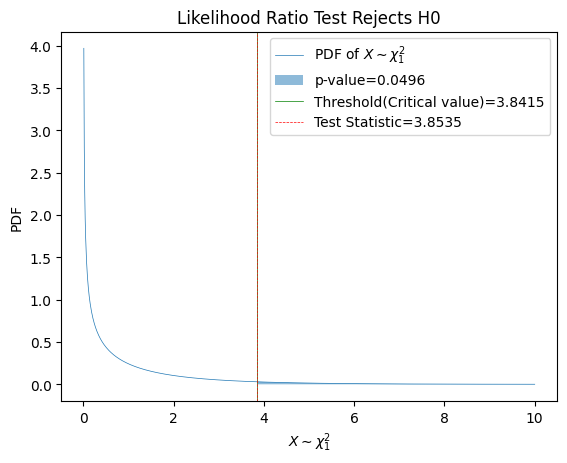

In [14]:
# code for recitation problem
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

n = 100
theta_hat = 2.45
theta0 = 2
alpha = 0.05

# Wald Test
w = n * (1/theta_hat) **2 * (theta_hat - theta0) ** 2
p_value_w = 1- chi2.cdf(w, 1)
print("Wald Test:")
print(f"Test Statistic: {w}") # 3.373594335693463
print(f"p_value:{p_value_w}") # 0.04964303921818336
print("---------------------")

# Likelihood Ratio Test
l_theta_hat =  n * np.log(theta_hat) + (-theta_hat-1)*n/theta_hat
l_theta0 = n * np.log(theta0) + (-theta0-1)*n/theta_hat
t = 2*( l_theta_hat - l_theta0) 
p_value_lrt = 1- chi2.cdf(t, 1)
print("Likelihood Ratio Test:")
print(f"Test Statistic: {t}") # 3.8534749217870967
print(f"p_value: {p_value_lrt}")

# prepare to plot pdfs
x = np.linspace(0, 10, 1000)
df = 1
critical_value = chi2.ppf(1-alpha, df)
pdf = chi2.pdf(x, df=1)

# plot wald test 
fig, ax = plt.subplots()
ax.plot(x, pdf, linewidth=0.5, label="PDF of $X \\sim \\chi^2_1$")
ax.fill_between(x, 0, pdf, where=(w<x), alpha=0.5, label=f"p-value={p_value_w:.4f}")
ax.axvline(x=critical_value, linewidth=0.5, c='g', label=f"Threshold(Critical value)={critical_value:.4f}")
ax.axvline(x=w, c="r", linewidth=0.5, label=f"Test Statistic W={w:.4f}", linestyle="--")
ax.set_title("Wald Test Fails to Reject H0")
ax.set_xlabel("$X \\sim \\chi^2_1$")
ax.set_ylabel("PDF")
ax.legend()
fig.savefig("wald.png") 

# plot wald test 
fig, ax = plt.subplots()
ax.plot(x, pdf, linewidth=0.5, label="PDF of $X \\sim \\chi^2_1$")
ax.fill_between(x, 0, pdf, where=(t<x), alpha=0.5, label=f"p-value={p_value_lrt:.4f}")
ax.axvline(x=critical_value, linewidth=0.5, c='g', label=f"Threshold(Critical value)={critical_value:.4f}")
ax.axvline(x=t, c="r", linewidth=0.5, label=f"Test Statistic={t:.4f}", linestyle="--")
ax.set_title("Likelihood Ratio Test Rejects H0")
ax.set_xlabel("$X \\sim \\chi^2_1$")
ax.set_ylabel("PDF")
ax.legend()
fig.savefig("lrt.png") 

plt.show()

In [17]:
import numpy as np
from scipy.stats import chi2

def likelihood_ratio_test(n, a, theta0):
    b = n - a  # Number of observations in [0, 1]
    
    # Compute the MLE of theta
    theta_hat = np.sqrt(a / n)
    
    # Ensure theta_hat is within (0, 1)
    if theta_hat <= 0 or theta_hat >= 1:
        raise ValueError("MLE theta_hat is outside the valid range (0, 1).")
    
    # Add a small epsilon to avoid log(0)
    epsilon = 1e-10
    
    # Compute the log-likelihoods
    ll_theta_hat = 2 * a * np.log(theta_hat + epsilon) + b * np.log(1 - theta_hat**2 + epsilon)
    ll_theta0 = 2 * a * np.log(theta0 + epsilon) + b * np.log(1 - theta0**2 + epsilon)
    
    # Compute the test statistic
    test_statistic = 2 * (ll_theta_hat - ll_theta0)
    
    # Compute the p-value
    p_value = 1 - chi2.cdf(test_statistic, df=1)
    
    return test_statistic, p_value

likelihood_ratio_test(100, 40, np.sqrt(0.5))

(4.027102708808599, 0.04477477236452376)

In [18]:
import scipy.stats as stats

# Degrees of freedom for the chi-squared distribution
df = 1

# Significance level (alpha)
alpha = 0.05

# Compute the critical value (threshold) at the given significance level
critical_value = stats.chi2.ppf(1 - alpha, df)

print(f"The critical value at the {100 * (1 - alpha)}% percentile for the chi-squared distribution with {df} degree of freedom is: {critical_value:.4f}")


The critical value at the 95.0% percentile for the chi-squared distribution with 1 degree of freedom is: 3.8415


In [ ]:
zero_two=0.2**4*0.8**2*0.2
zero_four=0.4**4*0.6**2*0.4
zero_six=0.6**4*0.4**2*0.2
zero_eight=0.8**4*0.2**2*0.2
normalizer=zero_two+zero_four+zero_six+zero_eight
p=[zero_two/normalizer,zero_four/normalizer,zero_six/normalizer,zero_eight/normalizer]
p
priors=[0.2,0.4,0.6,0.8]
sum([priors[i]*p[i] for i in range(4)])
#import numpy as np
np.median(p,axis=0)
p

[0.01809954751131222,
 0.32579185520361986,
 0.3665158371040724,
 0.2895927601809955]